**RNN Architecture Model**

The purpose of recurrent neural networks is to model sequences of tensors. The goal of recurrent networks is to learn a representation of a sequence.This is done by maintaining a hidden state vector that captures the current state of the sequence. The hidden state vector is computed from both a current input vector and the previous hidden state vector. 

As shown in the unrolled view in the below figure, also known as backpropagation through time (BPTT), the input vector from the current time step and the hidden state vector from the previous time step are mapped to the hidden state vector of the current time step. 

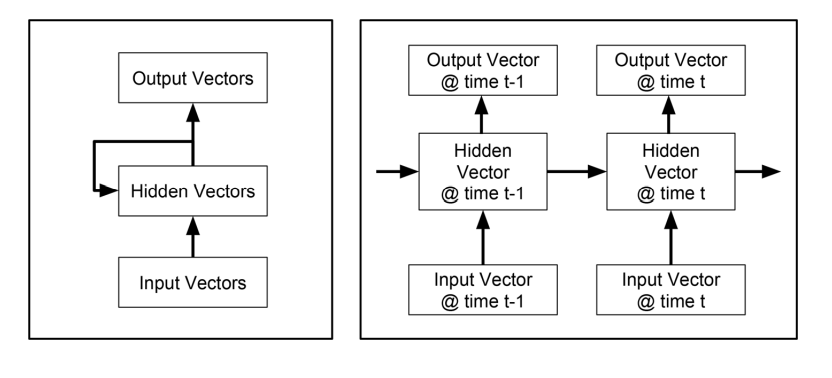

A new hidden vector is computed using a hidden to hidden weight matrix to map the previous hidden state vector and an input to hidden weight matrix to map the input vector.During training, these weights will be adjusted so that the RNN is learning how to incorporate incoming information and maintain a state representation summarizing the input seen so far. The RNN does not have any way of knowing which time step it is on. Instead, it is simply learning how to transition from one time step to another and maintain a state representation that will minimize its loss function.

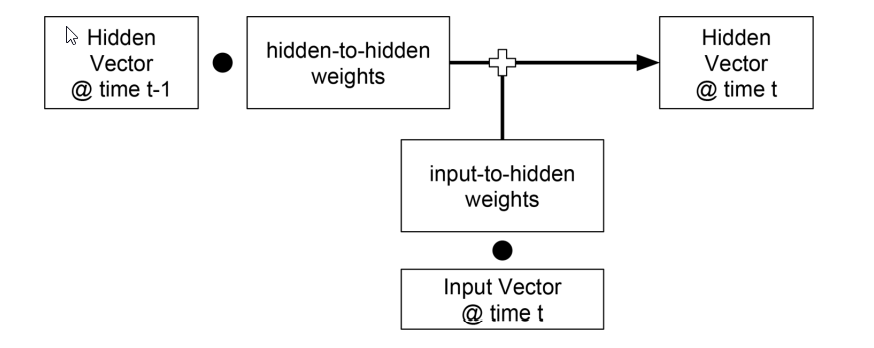



## Gated Recurrent Unit

GRU (Gated Recurrent Unit) aims to work in a way that allows relevant information to be kept in the hidden state even over long sequences in comparison to a standard recurrent neural network. GRUs are improved version of standard recurrent neural network. GRU uses an update gate and reset gate in addition to the traditional RNN. Basically, these are two vectors which decide what information should be passed to the output. The special thing about them is that they can be trained to keep information from long ago, without washing it through time or remove information which is irrelevant to the prediction. 

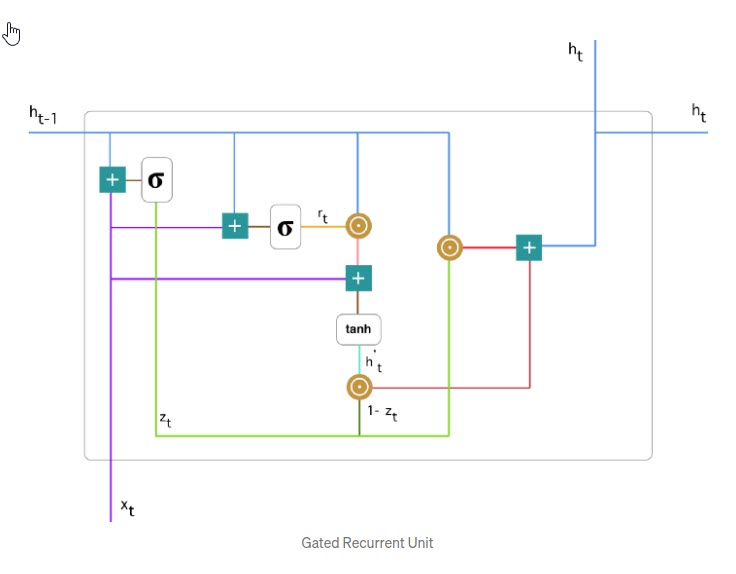

The following gates are implemented: 

### 1. Update gate: 
 
The update gate helps the model to determine how much of the past information (from previous time steps) needs to be passed along to the future.  
When $ x_{t}$ is plugged into the network unit, it is multiplied by its own weight $ W^{(z)}$. The same goes for $ h_{(t-1)}$ which holds the information for the previous t-1 units and is multiplied by its own weight $ U^{(z)}$ . Both results are added together and a sigmoid activation function is applied to squash the result between 0 and 1. 

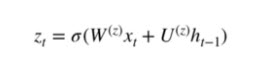

### 2. Reset gate

Essentially, this gate is used from the model to decide how much of the past information to forget. This formula is the same as the one for the update gate. As before the information and the input vectors  $ h_{(t-1)}$ and  $ x_{t}$ are plugged in, multiplied with their corresponding weights, sum up by the results and the sigmoid function is applied.

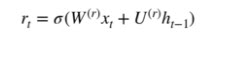

### 3. Current memory content

First, we start with the usage of the reset gate. We introduce a new memory content which will use the reset gate to store the relevant information from the past. It is calculated as follows: 
1.  Multiply the input $ x_{t}$ with a weight W and $ h_{(t-1)}$ with a weight U.
2.  Calculate the Hadamard (element-wise) product between the reset gate $ x_{t}$  and U $ h_{(t-1)}$. 

     That will determine what to remove from the previous time steps. Let’s say we have a sentiment analysis problem for determining one’s opinion about a book from a review they wrote. The text starts with “This is a fantasy book which illustrates…” and after a couple paragraphs ends with “I didn’t quite enjoy the book because I think it captures too many details.” To determine the overall level of satisfaction from the book we only need the last part of the review. In that case as the neural network approaches to the end of the text it will learn to assign $ r_{t}$  vector close to 0, washing out the past and focusing only on the last sentences. 
     
     
3.  Sum up the results of step 1 and 2.
4.  Apply the nonlinear activation function tanh.

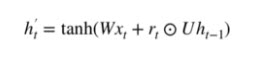


### 4. Final memory at current time step 

As the last step, the network needs to calculate $ h_{t}$ — vector which holds information for the current unit and passes it down to the network. In order to do that the update gate is needed. It determines what to collect from the current memory content —$ h'_{t}$ and what from the previous steps — $ h_{(t-1)}$. That is done as follows:

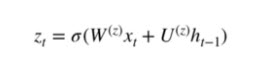

### GRU Example 

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

data = fetch_20newsgroups()

#Data Exploration 
print("Example News datapoint")
print(data.data[5])

print("Example News Group Category for the datapoint")
print(data.target_names[data.target[5]])

#For example purposes, the categories has been reduced to the following categories
categories = ['rec.autos', 'sci.med',
              'sci.space', 'comp.graphics']

#Train - Test dataset
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

## for processing
import re
import nltk

#### Preprocessing the text Data
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   
    ##characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

## Remove the stopwords
lst_stopwords = nltk.corpus.stopwords.words("english")

## Add custom words relevant to the context
lst_stopwords.append("subject")
lst_stopwords.append("lines")

##Cleaning the text data  
train.data = [utils_preprocess_text(i, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords) for i in train.data]

##Cleaning the text data  
test.data = [utils_preprocess_text(i, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords) for i in test.data]

train_df = pd.DataFrame({'Document': train.data, 
                   'Category': [train.target_names[i] for i in train.target],
                   'Target': train.target})

test_df = pd.DataFrame({'Document': test.data, 
                    'Category': [test.target_names[i] for i in test.target],
                    'Target': test.target})

df = train_df.append(test_df) 

Example News datapoint
From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless 

In [ ]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

max_len = 1000

max_words = 20000
tokenizer = Tokenizer(num_words = max_words)
# create the vocabulary by fitting on x_train text
tokenizer.fit_on_texts(train.data)
# generate the sequence of tokens
xtrain_seq = tokenizer.texts_to_sequences(train.data)
xtest_seq = tokenizer.texts_to_sequences(test.data)

# pad the sequences
xtrain_pad = pad_sequences(xtrain_seq, maxlen=max_len)
xtest_pad = pad_sequences(xtest_seq, maxlen=max_len)
word_index = tokenizer.word_index

print('text example:', test.data[0])
print('sequence of indices(before padding):', xtest_seq[0])
print('sequence of indices(after padding):', xtest_pad[0])


text example: awsitiorg allen w sherzer shuttle 0defects bizarre dcx organization evil genius better tomorrow 92 article 1sp513beohscuscedu khayashhscuscedu ken hayashida writes well spenzwhat say 8 youve attacked beloved vehicle may offer constructive criticism perhaps decide love vehicle use put think f86 beautiful aircraft rest assured wouldnt even think flying combat today u want access space judge vehicle perform see zerodefects operation many area life degree calling shuttle flight characteristic bizarre post touting dcx interesting dcx also similar zerodefects issue wrong wrong dc approach tollerent failure also advantage far greater reliability reusable nature shuttle isnt reusable salvagable thinking dcx deploy chute reverse orientation supersonic speed flip happens low speed supersonic dcx show flip work work unless law physic change much dcx redundant thats real question final dc1 fully intact abort throughout entire flight envelop upon reentry example loose 80 available thr

In [ ]:
%%time
import numpy as np
embedding_vectors = {}
# with open('/kaggle/input/glove6b100d/glove.6B.100d.txt','r',encoding='utf-8') as file:
with open('/content/glove.6B.300d.txt','r',encoding='utf-8') as file:
    for row in file:
        values = row.split(' ')
        word = values[0]
        weights = np.asarray([float(val) for val in values[1:]])
        embedding_vectors[word] = weights
print(f"Size of vocabulary in GloVe: {len(embedding_vectors)}")   

Size of vocabulary in GloVe: 400000
CPU times: user 41.2 s, sys: 2.61 s, total: 43.8 s
Wall time: 44 s


Load pre-trained word embeddings

In [ ]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q glove.6B.zip

In [ ]:
#initialize the embedding_matrix with zeros
emb_dim = 300
if max_words is not None: 
    vocab_len = max_words 
else:
    vocab_len = len(word_index)+1
embedding_matrix = np.zeros((vocab_len, emb_dim))
oov_count = 0
oov_words = []
for word, idx in word_index.items():
    if idx < vocab_len:
        embedding_vector = embedding_vectors.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
        else:
            oov_count += 1 
            oov_words.append(word)
#print some of the out of vocabulary words
print(f'Some out of vocabulary words: {oov_words[0:5]}')

Some out of vocabulary words: ['nntppostinghost', 'replyto', 'articleid', 'gebcspittedu', 'xnewsreader']


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing import text, sequence 
from tensorflow.keras.models import Sequential

gru_model = Sequential()
gru_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
gru_model.add(GRU(128, return_sequences=False))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(4, activation = 'softmax'))
gru_model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
print(gru_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 300)         6000000   
                                                                 
 gru_1 (GRU)                 (None, 128)               165120    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 6,165,636
Trainable params: 165,636
Non-trainable params: 6,000,000
_________________________________________________________________
None


In [ ]:
#Train the model 

batch_size = 256
epochs  = 10
history = gru_model.fit(xtrain_pad, np.asarray(train.target), validation_data=(xtest_pad, np.asarray(test.target)), batch_size = batch_size, epochs = epochs)


Epoch 1/10
10/10 [==============================] - 74s 7s/step - loss: 1.3175 - acc: 0.3780 - val_loss: 1.2193 - val_acc: 0.5067
Epoch 2/10
10/10 [==============================] - 70s 7s/step - loss: 1.0956 - acc: 0.5729 - val_loss: 1.0289 - val_acc: 0.5911
Epoch 3/10
10/10 [==============================] - 74s 8s/step - loss: 0.9329 - acc: 0.6520 - val_loss: 0.6852 - val_acc: 0.7625
Epoch 4/10
10/10 [==============================] - 71s 7s/step - loss: 0.5983 - acc: 0.7810 - val_loss: 0.4974 - val_acc: 0.8241
Epoch 5/10
10/10 [==============================] - 71s 7s/step - loss: 0.5120 - acc: 0.8165 - val_loss: 0.4171 - val_acc: 0.8552
Epoch 6/10
10/10 [==============================] - 71s 7s/step - loss: 0.3273 - acc: 0.8922 - val_loss: 0.3718 - val_acc: 0.8883
Epoch 7/10
10/10 [==============================] - 71s 7s/step - loss: 0.2561 - acc: 0.9192 - val_loss: 0.4621 - val_acc: 0.8654
Epoch 8/10
10/10 [==============================] - 71s 7s/step - loss: 0.2368 - acc: 0.93

## LSTM

**The Problem of Long-Term Dependencies**
One of the appeals of RNNs is the idea that they might be able to connect previous information to the present task, such as using previous video frames might inform the understanding of the present frame. Sometimes, we only need to look at recent information to perform the present task. For example, consider a language model trying to predict the next word based on the previous ones. If we are trying to predict the last word in “the clouds are in the sky,” we don’t need any further context – it’s pretty obvious the next word is going to be sky. In such cases, where the gap between the relevant information and the place that it’s needed is small, RNNs can learn to use the past information.

**LSTM Networks**

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used. 

In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer. 
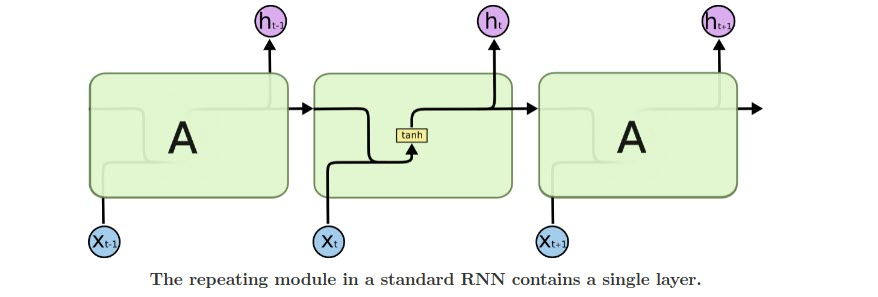


LSTMs also have this chain like structure, but the repeating module has a different structure.
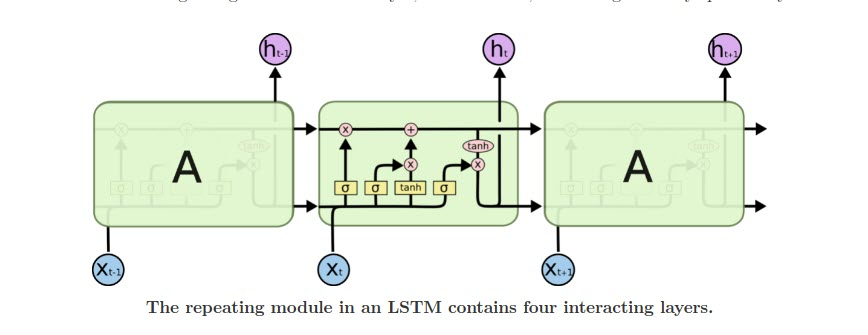

### 1. forget gate
The first step in our LSTM is to decide what information we’re going to throw away from the cell state. This decision is made by a sigmoid layer called the “forget gate layer.” It looks at $ h_{(t-1)}$  and $ x_{t}$ , and outputs a number between 0 and 1 for each number in the cell state $ C_{(t-1)}$ . A 1 represents “completely keep this” while a 0 represents “completely get rid of this.

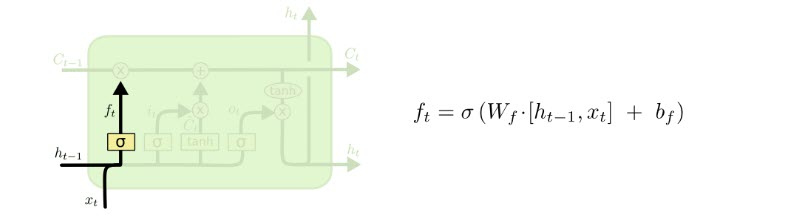 


### 2. input gate
The next step is to decide what new information we’re going to store in the cell state. This has two parts. First, a sigmoid layer called the “input gate layer” decides which values we’ll update. Next, a tanh layer creates a vector of new candidate values, $C^~t$, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.
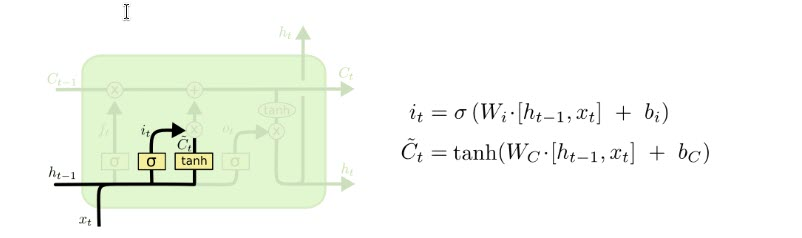


### 3.update gate 
We multiply the old state by ft, forgetting the things we decided to forget earlier. Then we add it∗C~t. This is the new candidate values, scaled by how much we decided to update each state value. 
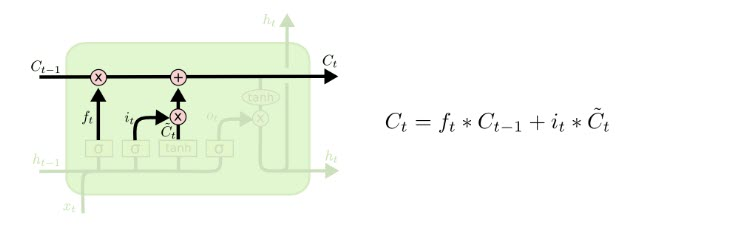

### 4.output gate
Finally, we need to decide what we’re going to output. This output will be based on our cell state, but will be a filtered version. First, we run a sigmoid layer which decides what parts of the cell state we’re going to output. Then, we put the cell state through tanh (to push the values to be between −1 and 1) and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

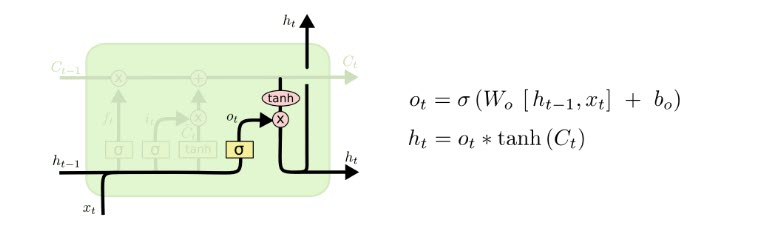


### LSTM Example

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing import text, sequence 
from tensorflow.keras.models import Sequential

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
lstm_model.add(LSTM(128, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(4, activation = 'softmax'))
lstm_model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
print(lstm_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 300)         6000000   
                                                                 
 lstm_2 (LSTM)               (None, 128)               219648    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 6,220,164
Trainable params: 220,164
Non-trainable params: 6,000,000
_________________________________________________________________
None


In [ ]:
#Train the model 

batch_size = 256
epochs  = 10
history = lstm_model.fit(xtrain_pad, np.asarray(train.target), validation_data=(xtest_pad, np.asarray(test.target)), batch_size = batch_size, epochs = epochs)


Epoch 1/10
10/10 [==============================] - 101s 10s/step - loss: 1.3431 - acc: 0.4478 - val_loss: 0.7601 - val_acc: 0.7454
Epoch 2/10
10/10 [==============================] - 88s 9s/step - loss: 0.7555 - acc: 0.7522 - val_loss: 0.3962 - val_acc: 0.8857
Epoch 3/10
10/10 [==============================] - 87s 9s/step - loss: 0.4738 - acc: 0.8609 - val_loss: 0.4632 - val_acc: 0.8476
Epoch 4/10
10/10 [==============================] - 83s 8s/step - loss: 0.3408 - acc: 0.9112 - val_loss: 0.6746 - val_acc: 0.7663
Epoch 5/10
10/10 [==============================] - 85s 9s/step - loss: 0.3488 - acc: 0.8994 - val_loss: 0.3160 - val_acc: 0.9073
Epoch 6/10
10/10 [==============================] - 86s 9s/step - loss: 0.2781 - acc: 0.9218 - val_loss: 0.4981 - val_acc: 0.8603
Epoch 7/10
10/10 [==============================] - 86s 9s/step - loss: 0.2756 - acc: 0.9256 - val_loss: 0.4808 - val_acc: 0.8743
Epoch 8/10
10/10 [==============================] - 88s 9s/step - loss: 0.2361 - acc: 0.